# Iris data set exploration and analysis 

***
### Module: Fundamentals of Data Analsis
### HDip in Data Analysis at ATU 

#### Author: Shane Keenan 
#### Submission due date: 22/12/2023
#### Status: ongoing 

***

### Project description (from Lecturer Ian McLoughlin )

• The project is to create a notebook investigating the variables and
data points within the well-known iris flower data set associated
with Ronald A Fisher.

Iris – UCI Machine Learning Repository.
Aug. 17, 2023. url: https://archive.ics.uci.edu/dataset/53/iris
(visited on 08/17/2023).

• In the notebook, you should discuss the classification of each
variable within the data set according to common variable types
and scales of measurement in mathematics, statistics, and Python.

• Select, demonstrate, and explain the most appropriate summary
statistics to describe each variable.

• Select, demonstrate, and explain the most appropriate plot(s) for
each variable.

• The notebook should follow a cohesive narrative about the data
set.

***

### let's start by importing the necessary python packages 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random 
from PIL import Image

### and have a look at the Iris flowers themselves to give the data set some context

Text(0, 1500, 'Figure 1. The 3 iris species in the iris data set. (Source: https://en.wikipedia.org/wiki/Iris_flower_data_set)')

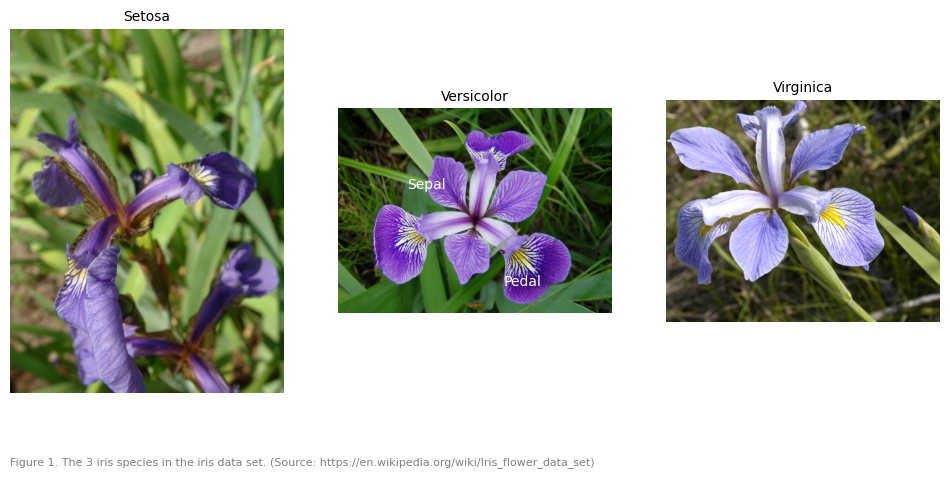

In [13]:
image1 = Image.open("C:\\Users\\shane\\Desktop\\HDip in Data Analytics\\Semester 2\\Fundamentals of Data Analysis\\fundamentals_of_data_analysis\\project data\\img\\Iris_setosa.jpg")
image2 = Image.open("C:\\Users\\shane\\Desktop\\HDip in Data Analytics\\Semester 2\\Fundamentals of Data Analysis\\fundamentals_of_data_analysis\\project data\\img\\Iris_versicolor.jpg")
image3 = Image.open("C:\\Users\\shane\\Desktop\\HDip in Data Analytics\\Semester 2\\Fundamentals of Data Analysis\\fundamentals_of_data_analysis\\project data\\img\\Iris_virginica.jpg")
#fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)
ax1.imshow(image1)
ax2.imshow(image2)
ax3.imshow(image3)  
ax1.axis('off')
ax2.axis('off')
ax3.axis('off')
ax1.set_title("Setosa", fontsize=10)
ax2.set_title("Versicolor", fontsize=10)
ax3.set_title("Virginica",fontsize=10 )
ax2.text(500, 500, 'Sepal', color='white', fontsize=10, ha='left', va='top', alpha=1)
ax2.text(1200, 1200, 'Pedal', color='white', fontsize=10, ha='left', va='top', alpha=1)
ax1.text(0, 1500, 'Figure 1. The 3 iris species in the iris data set. (Source: https://en.wikipedia.org/wiki/Iris_flower_data_set)', color='black', fontsize=8, ha='left', va='top', alpha=0.5)
#plt.arrow(2,5,4,2,width=.3, edgecolor='green',facecolor='red',linestyle='--',linewidth=3)

### • In the notebook, you should discuss the classification of each variable within the data set according to common variable types and scales of measurement in mathematics, statistics, and Python.

### OK to start lets import the data set as a dataFrame and display 

In [23]:
''' download iris.csv data file and change this path ''' #read in the csv file from local drive 
data = pd.read_csv("C:\\Users\\shane\\Desktop\\HDip in Data Analytics\\Semester 2\\Fundamentals of Data Analysis\\fundamentals_of_data_analysis\\project data\\iris.csv")
data #  displays the top 5 rows 

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [27]:
data.dtypes # what are the python data types 

Sepal_Length_[cm]    float64
Sepal_Width_[cm]     float64
Petal_Length_[cm]    float64
Petal_Width_[cm]     float64
Species               object
dtype: object

### Data set description

The Iris data set is a multivariate data set collated by British statistician and biologist Ronald Fisher. It was first published in his 1936 paper "The use of multiple measurements in taxonomic problems" as an example of linear discriminant analysis. 
The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor) giving a total of 150 rows of data.


There are 5 columns of data;
4 columns containing measurements of the various flower characteractics, Sepal Length [cm], Sepal Width [cm], Petal Length [cm] and Petal Width [cm].
These are numberical real varaibles with precision to one decimal place and are represented by floating point numbers in python (float64). In statistical terms, where scale of measurement refers to the way variables are defined and categorized (in statistics: *nominal*, *ordinal*, *interval*, and *ratio*), these variables are Ratio scale as they have a true zero point (0 cm) and allow for differences between values to be determined. 

The 5th column specifies the species of Iris. In which there are 3 species of Iris. This is categorical varaible represented as an object in python. In statical terms, scale of measurement, it is a nominal value. Used simply to label the variable and has no quantitative value. 

The 3 species of Iris are shown in figure 1 along with labels of the pedal and sepal parts of the Iris.
Note: the Sepal is any of the outer parts of a flower that enclose and protect the unopened flower bud and for these Iris are coloured similarly to the pedal.

In Python, we use the pandas library to store the variables of both types (numerical and cattegorical) in to a `DataFrame`. From here we can easily maniplate the data and handle the different data types together. 


Reference: 

[1] Types of Variable: https://statistics.laerd.com/statistical-guides/types-of-variable.php

[2] Topic #1: Introduction to measurement and statistics. https://lsc.cornell.edu/wp-content/uploads/2016/01/Intro-to-measurement-and-statistics.pdf

[3] Levels of Measurement | Nominal, Ordinal, Interval and Ratio: https://www.scribbr.com/statistics/levels-of-measurement/




In [24]:
# tidy up the data - rename the columns with formated titles
newcols={"sepallength":"Sepal_Length_[cm]","sepalwidth":"Sepal_Width_[cm]","petallength":"Petal_Length_[cm]","petalwidth":"Petal_Width_[cm]","class":"Species"}
# rename columns
data = data.rename(columns=newcols)
data

,Sepal_Length_[cm],Sepal_Width_[cm],Petal_Length_[cm],Petal_Width_[cm],Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica



### • Select, demonstrate, and explain the most appropriate summary statistics to describe each variable.

The most apppropriate summary statistics to describe the numerical quantitative variables (Sepal Length, Sepal Width, Petal Length and Petal Width) in the Iris dataset would be to determine the *mean*, *standard deviation*, *minimum and maximum* and *quartiles*. 

For the *categorical variable* (*species*), statistics we can determine is *Frequency* and *proportionality* (percentage of each category)

In [34]:
#  .describe() generates all the summary statistics for the whole data set 
data.describe()

,Sepal_Length_[cm],Sepal_Width_[cm],Petal_Length_[cm],Petal_Width_[cm]
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [31]:
# However what is more useful is to generate the summary statistics for the individual species of Iris. 
data[data['Species'] == 'Iris-setosa'].describe()

#list with column names for plotting axes 
#cols = ['Sepal Length [cm]', 'Sepal Width [cm]', 'Petal Length [cm]', 'Petal Width [cm]']
#cols[1]

,Sepal_Length_[cm],Sepal_Width_[cm],Petal_Length_[cm],Petal_Width_[cm]
count,50.00000,50.000000,50.000000,50.00000
mean,5.00600,3.418000,1.464000,0.24400
std,0.35249,0.381024,0.173511,0.10721
min,4.30000,2.300000,1.000000,0.10000
25%,4.80000,3.125000,1.400000,0.20000
50%,5.00000,3.400000,1.500000,0.20000
75%,5.20000,3.675000,1.575000,0.30000
max,5.80000,4.400000,1.900000,0.60000


In [35]:
data[data['Species'] == 'Iris-virginica'].describe()

,Sepal_Length_[cm],Sepal_Width_[cm],Petal_Length_[cm],Petal_Width_[cm]
count,50.00000,50.000000,50.000000,50.00000
mean,6.58800,2.974000,5.552000,2.02600
std,0.63588,0.322497,0.551895,0.27465
min,4.90000,2.200000,4.500000,1.40000
25%,6.22500,2.800000,5.100000,1.80000
50%,6.50000,3.000000,5.550000,2.00000
75%,6.90000,3.175000,5.875000,2.30000
max,7.90000,3.800000,6.900000,2.50000


In [36]:
data[data['Species'] == 'Iris-virginica'].describe()

,Sepal_Length_[cm],Sepal_Width_[cm],Petal_Length_[cm],Petal_Width_[cm]
count,50.00000,50.000000,50.000000,50.00000
mean,6.58800,2.974000,5.552000,2.02600
std,0.63588,0.322497,0.551895,0.27465
min,4.90000,2.200000,4.500000,1.40000
25%,6.22500,2.800000,5.100000,1.80000
50%,6.50000,3.000000,5.550000,2.00000
75%,6.90000,3.175000,5.875000,2.30000
max,7.90000,3.800000,6.900000,2.50000


### Boxplots - great way to visualise summary statistics 

I stuck in all the bells and whistles for this box plot... 

Here we see the data plotted horizontally for each species against the four attributes. The plot shows the range, interquartile range, median, mode, outliers, and all quartiles of the data set.'THe red line indicates the median of the data, the green triangle the mean value, open circles indcicate the outlier points 

Text(0.5, 1.0, 'Pedal width distribution for Iris species')

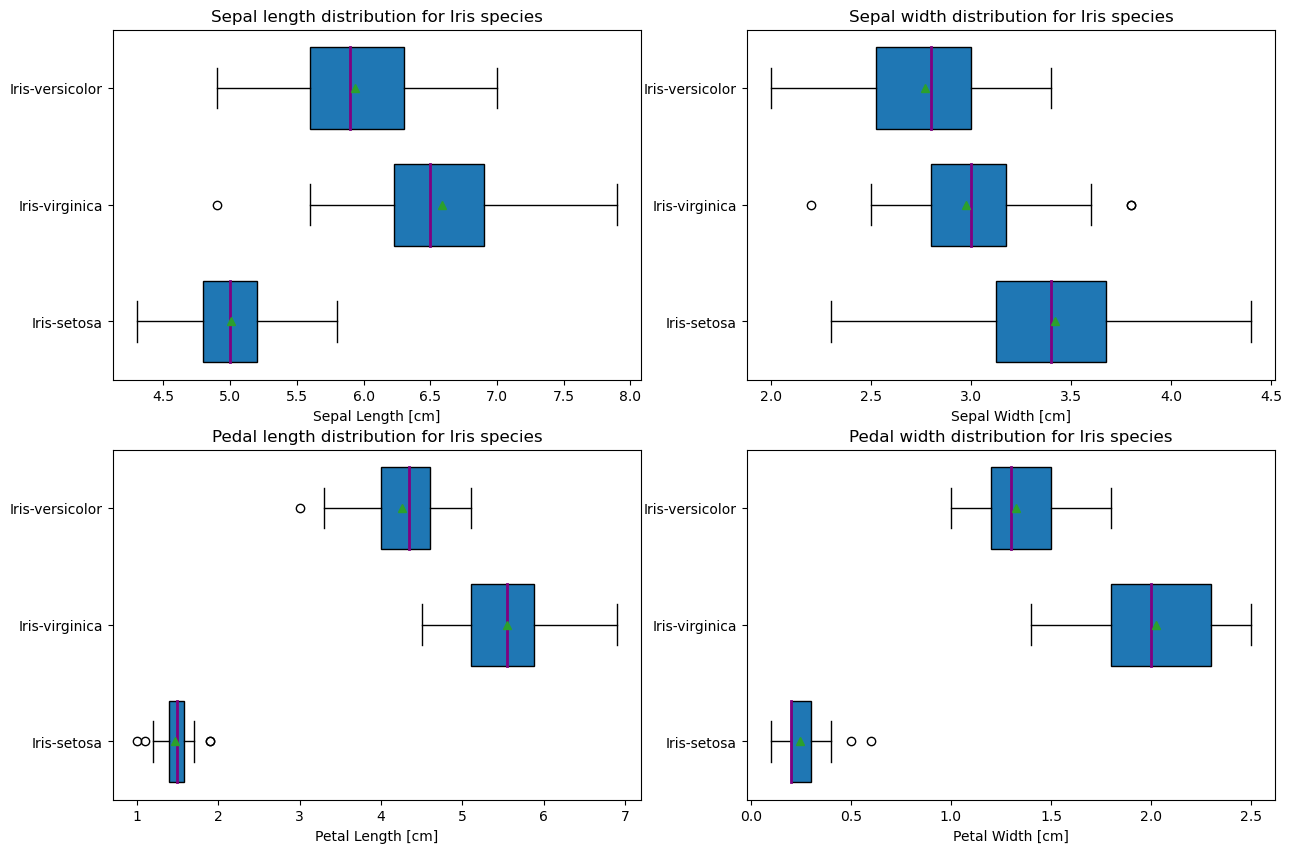

In [42]:
#list with column names for plotting axes 
cols = ['Sepal Length [cm]', 'Sepal Width [cm]', 'Petal Length [cm]', 'Petal Width [cm]']
#cols[1]

#box plot
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
A = [data['Sepal_Length_[cm]'][data.Species == 'Iris-setosa'], data['Sepal_Length_[cm]'][data.Species == 'Iris-virginica'], data['Sepal_Length_[cm]'][data.Species == 'Iris-versicolor']]
B = [data['Sepal_Width_[cm]'][data.Species == 'Iris-setosa'], data['Sepal_Width_[cm]'][data.Species == 'Iris-virginica'], data['Sepal_Width_[cm]'][data.Species == 'Iris-versicolor']]
C = [data['Petal_Length_[cm]'][data.Species == 'Iris-setosa'], data['Petal_Length_[cm]'][data.Species == 'Iris-virginica'], data['Petal_Length_[cm]'][data.Species == 'Iris-versicolor']]
D = [data['Petal_Width_[cm]'][data.Species == 'Iris-setosa'], data['Petal_Width_[cm]'][data.Species == 'Iris-virginica'], data['Petal_Width_[cm]'][data.Species == 'Iris-versicolor']]

ax[0, 0].boxplot(A, labels=('Iris-setosa', 'Iris-virginica', 'Iris-versicolor'),vert=False,widths = 0.7, patch_artist=True, showmeans=True, meanprops={'linewidth': 2, 'color': 'red'},medianprops={'linewidth': 2, 'color': 'purple'})
ax[0, 0].set_title('Sepal length distribution for Iris species')
ax[0, 0].set_xlabel(cols[0])
    
ax[0, 1].boxplot(B, labels=('Iris-setosa', 'Iris-virginica', 'Iris-versicolor'), vert=False,widths = 0.7, patch_artist=True, showmeans=True, meanprops={'linewidth': 2, 'color': 'red'},medianprops={'linewidth': 2, 'color': 'purple'})
ax[0, 1].set_xlabel(cols[1])
ax[0, 1].set_title('Sepal width distribution for Iris species')
ax[1, 0].boxplot(C,labels=('Iris-setosa', 'Iris-virginica', 'Iris-versicolor'), vert=False,widths = 0.7, patch_artist=True, showmeans=True, meanprops={'linewidth': 2, 'color': 'red'},medianprops={'linewidth': 2, 'color': 'purple'})
ax[1, 0].set_xlabel(cols[2])
ax[1, 0].set_title('Pedal length distribution for Iris species')
ax[1, 1].boxplot(D, labels=('Iris-setosa', 'Iris-virginica', 'Iris-versicolor'), vert=False,widths = 0.7, patch_artist=True, showmeans=True, meanprops={'linewidth': 2, 'color': 'red'},medianprops={'linewidth': 2, 'color': 'purple'})
ax[1, 1].set_xlabel(cols[3])
ax[1, 1].set_title('Pedal width distribution for Iris species')


In [10]:
# check the quality of the data - missing data etc. 
data.isnull().sum()


Sepal Length [cm]    0
Sepal Width [cm]     0
Petal Length [cm]    0
Petal Width [cm]     0
Species              0
dtype: int64